## Introduction

Hospital readmissions pose a significant financial challenge, often resulting in penalties from the Centers for Medicare & Medicaid Services (CMS) and other payers. These penalties can substantially reduce a hospital’s revenue, especially for facilities with high readmission rates. Diabetes, one of the top ten leading causes of death worldwide, is also the most expensive chronic disease in the United States. Hospitalized patients with diabetes face a higher risk of readmission compared to those without the condition. Consequently, efforts to reduce readmission rates among diabetic patients hold considerable potential for lowering overall healthcare costs.

The dataset used in this analysis provides detailed information on patients with obesity, including their readmission status, number of hospital visits, frequency of emergency room use, medical specialty involved, and other relevant clinical and demographic variables. This data offers valuable insights into patterns and risk factors associated with hospital readmissions in this population.

## Content

- Data description

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/hospital_readmissions.csv")
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

Dataset I downloaded here should be well cleaned dataset

In [10]:
df.describe() 

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


#### Plot see the distribution of time-in-hospital

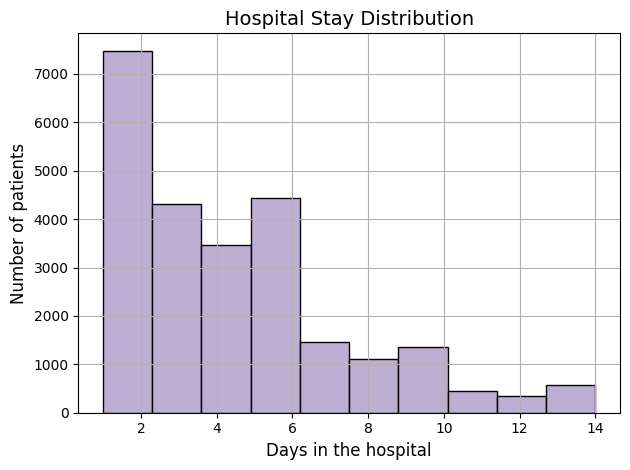

In [34]:
df["time_in_hospital"].hist(bins = 10, color = "#beaed4", edgecolor="black" )
plt.xlabel("Days in the hospital", fontsize = 12)
plt.ylabel("Number of patients", fontsize = 12)
plt.title("Hospital Stay Distribution", fontsize = 14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()           # Adjusts padding nicely
plt.show()

#### Which medical specialty is the most common

In [13]:
df["medical_specialty"].value_counts().head()

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Name: count, dtype: int64

#### The relation of  medical specialty and the time in hospital

In [11]:
df.groupby("medical_specialty")["time_in_hospital"].mean().sort_values(ascending = False).head()

medical_specialty
InternalMedicine          4.748948
Surgery                   4.625721
Other                     4.590465
Emergency/Trauma          4.516711
Family/GeneralPractice    4.424548
Name: time_in_hospital, dtype: float64

#### Age versus the time in the hospital

In [13]:
df.groupby("age")["time_in_hospital"].mean().sort_values(ascending = False)

age
[80-90)     4.813773
[90-100)    4.762667
[70-80)     4.599093
[60-70)     4.384407
[50-60)     4.154537
[40-50)     4.011453
Name: time_in_hospital, dtype: float64

From the result we can clear see that the age has a positive correlation with the time spend in hospital

#### Dig into see the readimission status

In [15]:
df.groupby("readmitted")["time_in_hospital"].mean()

readmitted
no     4.331345
yes    4.590778
Name: time_in_hospital, dtype: float64